In [205]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [ ]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type):

    for label, content in current_pd.items():
        if 'LZ' in label:
            subs = 'LZ'
        if 'SEV-952' in label:
            subs = 'SEV-952'
        if 'SEV-953' in label:
            subs = 'SEV-953'
        
        if 'Control' in label:
            conc = 'Control'
        if '-2' in label:
            conc = '1E-2M'
        if '-3' in label:
            conc = '1E-3M'
        if '-4' in label:
            conc = '1E-4M'

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = subs
        data_pd_i['Concentration'] = conc

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [ ]:
fh_path = "D:\Krasnov\FH.xlsx"
vero_path = "D:\Krasnov\Vero.xlsx"
rd_path = "D:\Krasnov\RD.xlsx"

vero_pd_raw = pd.read_excel(vero_path)
fh_pd_raw = pd.read_excel(fh_path)
rd_pd_raw = pd.read_excel(rd_path)


In [ ]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

data_pd = excel_to_pd(data_pd,data_pd_i,vero_pd_raw,'Vero')
data_pd = excel_to_pd(data_pd,data_pd_i,fh_pd_raw,'FH')
data_pd = excel_to_pd(data_pd,data_pd_i,rd_pd_raw,'RD')


# print(data_pd)

<AxesSubplot: xlabel='Substance', ylabel='OD'>

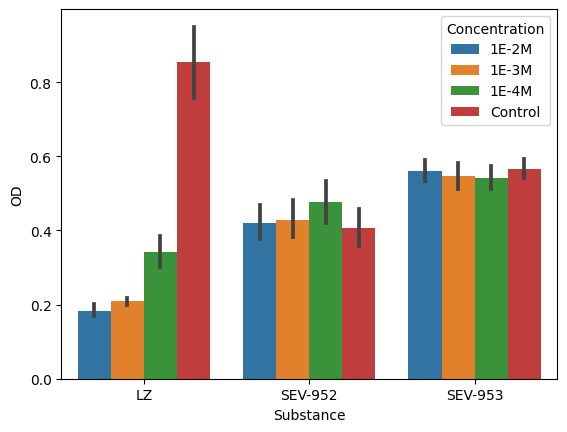

In [233]:
data_ext = data_pd[(data_pd['Cell_type'] == 'FH')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

In [236]:
data_ext = data_pd[(data_pd['Cell_type'] == 'RD')].copy()
substances_list = ['LZ','SEV-952','SEV-953']

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
# print(data)

C:\Users\Modern\AppData\Local\Temp\ipykernel_21892\3712258778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_21892\3712258778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_i['Relative'] = data_i['OD']/control_mean*100
C:\Users\Modern\AppData\Local\Temp\ipykernel_21892\3712258778.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SEV-953_1E-4M vs. SEV-953_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.810e+02
SEV-952_1E-4M vs. SEV-952_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.670e+02
LZ_1E-4M vs. LZ_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.574e-01 U_stat=1.025e+02
SEV-953_1E-3M vs. SEV-953_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.530e+02
LZ_1E-3M vs. LZ_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.661e-06 U_stat=0.000e+00
SEV-952_1E-3M vs. SEV-952_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.860e+02
SEV-953_1E-2M vs. SEV-953_Control: Mann-W

(<AxesSubplot: xlabel='Substance', ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x1559e3f02b0>])

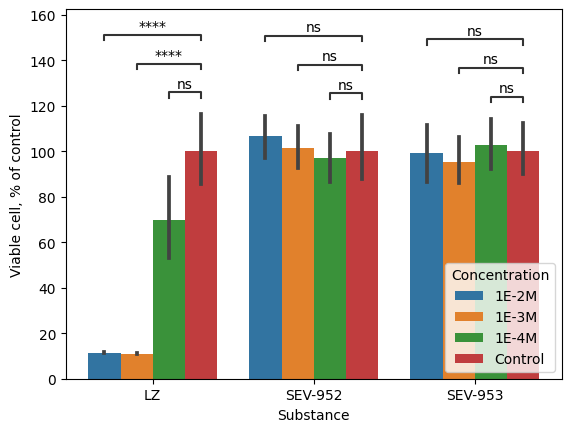

In [237]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration')
ax.set(xlabel='Substance', ylabel='Viable cell, % of control')

pairs=[(('LZ','Control'),('LZ','1E-2M')),(('LZ','Control'),('LZ','1E-3M')),(('LZ','Control'),('LZ','1E-4M')),
       (('SEV-952','Control'),('SEV-952','1E-2M')),(('SEV-952','Control'),('SEV-952','1E-3M')),(('SEV-952','Control'),('SEV-952','1E-4M')),
       (('SEV-953','Control'),('SEV-953','1E-2M')),(('SEV-953','Control'),('SEV-953','1E-3M')),(('SEV-953','Control'),('SEV-953','1E-4M'))]

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

